## US Accidents Exploratory Data Analysis


# us-accidents-analysis

- EDA
- About Dataset (
  - source - Kaggle,
  - Information about accidents,
  - Helps in mitigation
)
 - Mention that it does not contain data about NewYork

## Download the data


In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikhildevadiga007
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents


100%|██████████| 653M/653M [00:02<00:00, 279MB/s]


In [3]:
data_filename = './us-accidents/US_Accidents_March23.csv'

## Data Preparation and cleaning
1. load the file using pandas
2. Look at some information about the data and columns
3. Fix any missing or incorrect values


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

percentage of missing values per columns

In [7]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages


,0
End_Lng,4.402935e-01
End_Lat,4.402935e-01
Precipitation(in),2.851286e-01
Wind_Chill(F),2.586590e-01
Wind_Speed(mph),7.391355e-02
Visibility(mi),2.291524e-02
Wind_Direction,2.267043e-02
Humidity(%),2.253301e-02
Weather_Condition,2.244438e-02
Temperature(F),2.120143e-02


In [8]:
missing_percentages[missing_percentages != 0]

,0
End_Lng,4.402935e-01
End_Lat,4.402935e-01
Precipitation(in),2.851286e-01
Wind_Chill(F),2.586590e-01
Wind_Speed(mph),7.391355e-02
Visibility(mi),2.291524e-02
Wind_Direction,2.267043e-02
Humidity(%),2.253301e-02
Weather_Condition,2.244438e-02
Temperature(F),2.120143e-02


<Axes: >

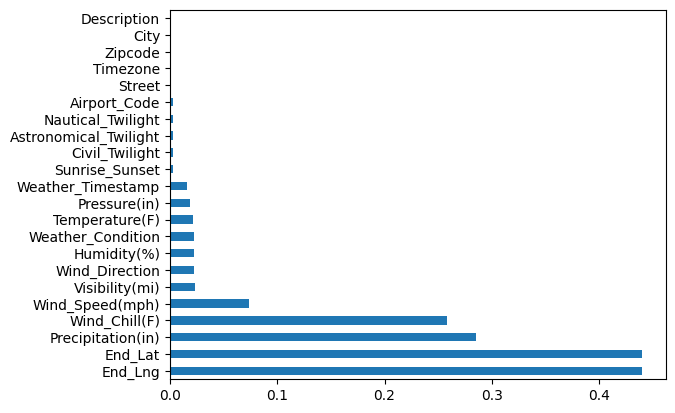

In [9]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

# Remove columns that are missing most of the time

## Exploratory Analysis and Visualization

Columns we'll analyse:
1. city
2. Start Time
3. start Lat, start lng
4. temperature
5. weather condition
6.

### City

In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
cities = df.City.unique()
len(cities)

13679

In [12]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents[:20]

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930


In [13]:
'New York' in df.City

False

In [14]:
'NY' in df.State

False

<Axes: ylabel='City'>

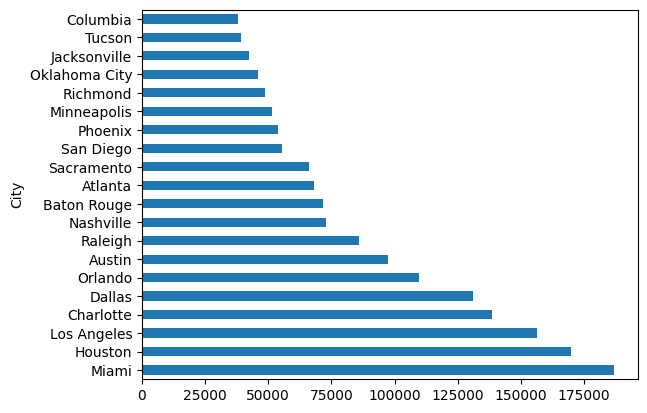

In [15]:
cities_by_accidents[:20].plot(kind = 'barh')

In [16]:
import seaborn as sns
sns.set_style("darkgrid")

<Axes: xlabel='count', ylabel='Count'>

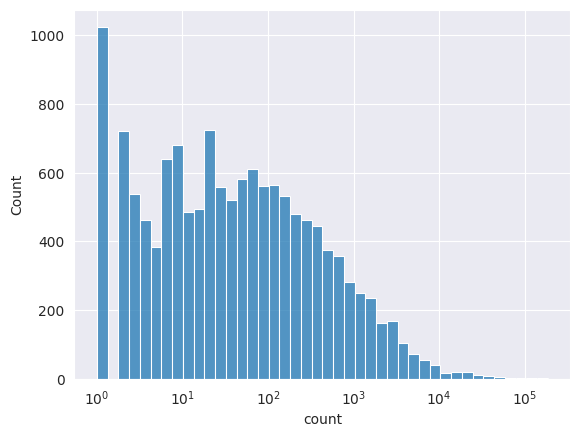

In [17]:
sns.histplot(cities_by_accidents, log_scale = True)

In [18]:
high_accident_cities = cities_by_accidents[cities_by_accidents>=1000]
low_accident_cities = cities_by_accidents[cities_by_accidents<1000]

In [19]:
len(high_accident_cities)

1218

<Axes: xlabel='count', ylabel='Count'>

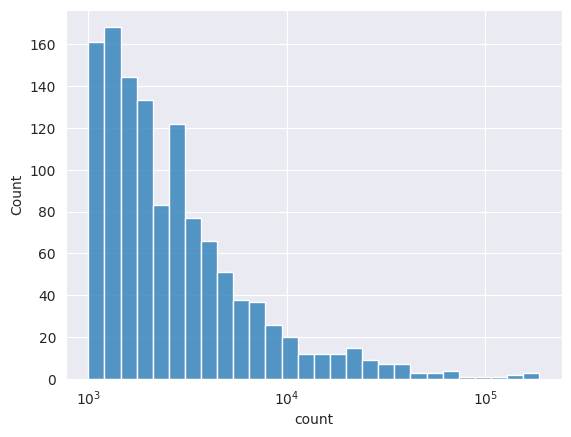

In [20]:
sns.histplot(high_accident_cities, log_scale = True)

<ipython-input-21-a69b07a78e7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)


<Axes: xlabel='count', ylabel='Density'>

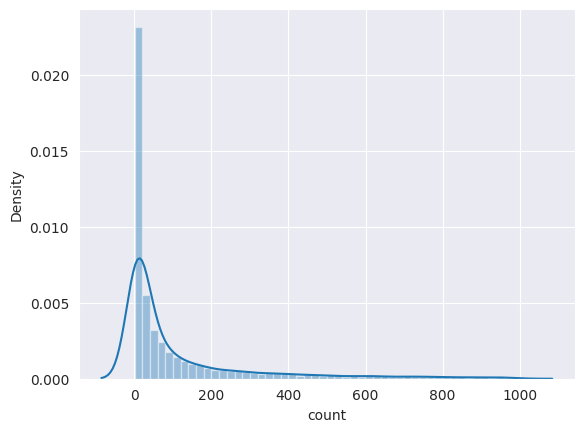

In [21]:
sns.distplot(low_accident_cities)

In [22]:
len(cities_by_accidents[cities_by_accidents==1])

1023

### Start Time

In [23]:
type(df.Start_Time[0])

str

In [24]:
df.Start_Time=pd.to_datetime(df.Start_Time,format='ISO8601')

In [25]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

-Figure out how to show percentage

<ipython-input-26-ec7bc99ccecf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

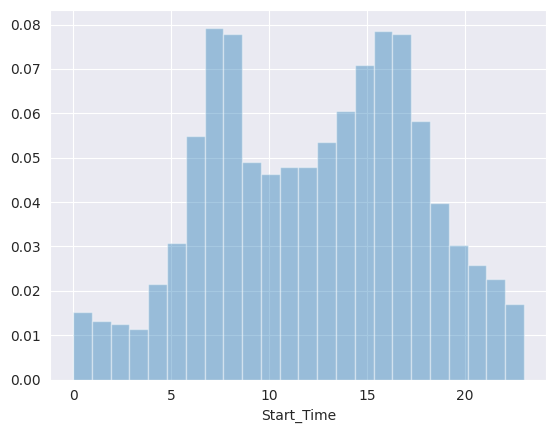

In [26]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist = True)

- High percentage of accidents happen between 6 to 9 Am (Probably due to people leaving in a hurry for work)
- Next highest accidents happen between 3 to 6 PM

<ipython-input-27-346254347150>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins =7, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

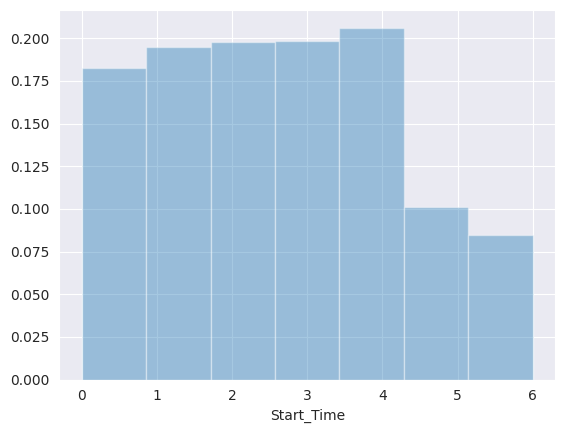

In [27]:
sns.distplot(df.Start_Time.dt.dayofweek, bins =7, kde=False, norm_hist = True)

- Is the distribution of accidents by hour the same on weekends as on weekdays.

<ipython-input-30-9e7df75db354>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sunday_start_time.dt.hour, bins =24, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

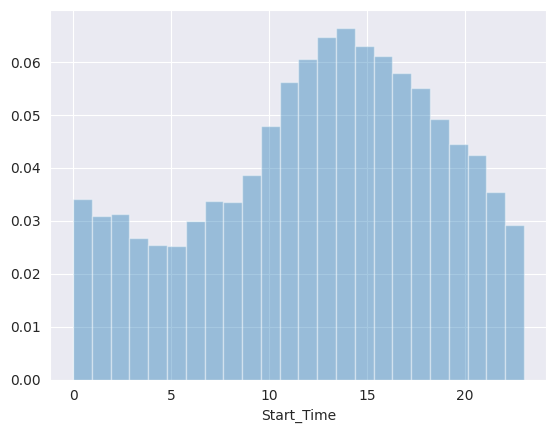

In [30]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_start_time.dt.hour, bins =24, kde=False, norm_hist = True)

<ipython-input-33-f3bda6a59082>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins =24, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

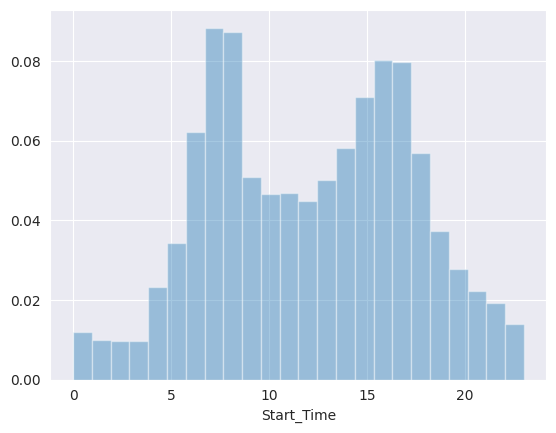

In [33]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_start_time.dt.hour, bins =24, kde=False, norm_hist = True)

In [36]:
df_2019 = df[df.Start_Time.dt.year == 2019]

<ipython-input-38-fb9bd6de5004>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

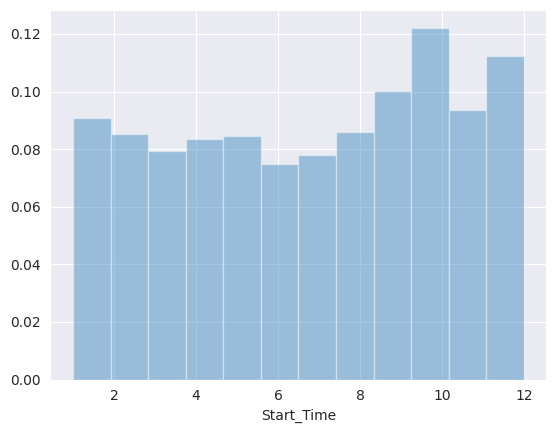

In [38]:
sns.distplot(df_2019.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)

<ipython-input-39-4e80696af62b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2020.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

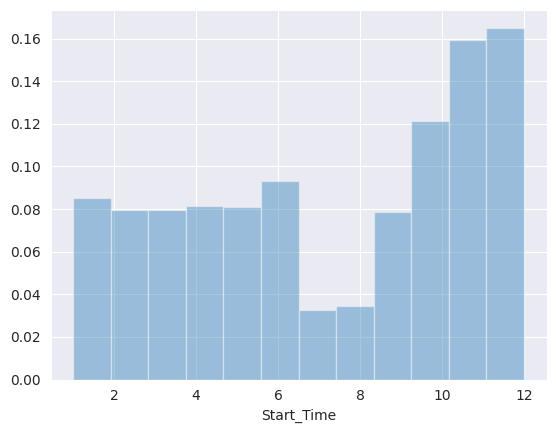

In [39]:
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)

<ipython-input-40-ad37943e15cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2022.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)


<Axes: xlabel='Start_Time'>

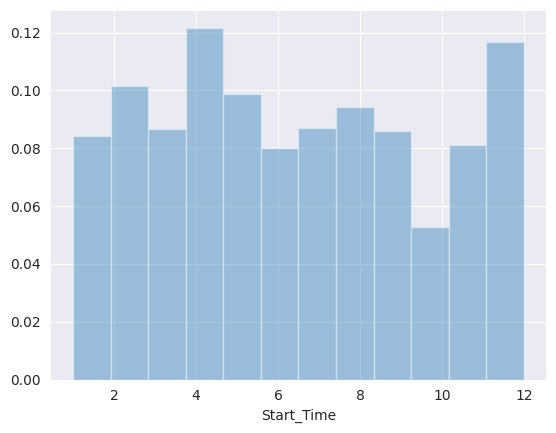

In [40]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.distplot(df_2022.Start_Time.dt.month, bins =12, kde=False, norm_hist = True)

<Axes: ylabel='count'>

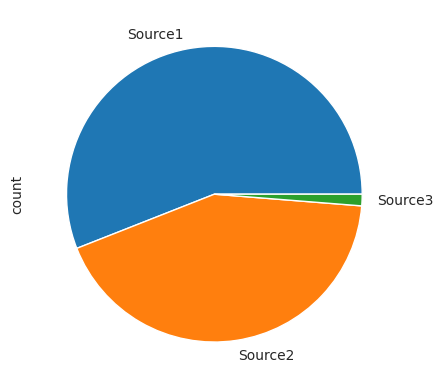

In [41]:
df.Source.value_counts().plot(kind='pie')

Can you explain the monthwise trend?
- Much data is missing for 2016, 2019
- 2020 There was very less accidents due to country wide lockdowns

### Start Latitude & Start Longitude

In [47]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

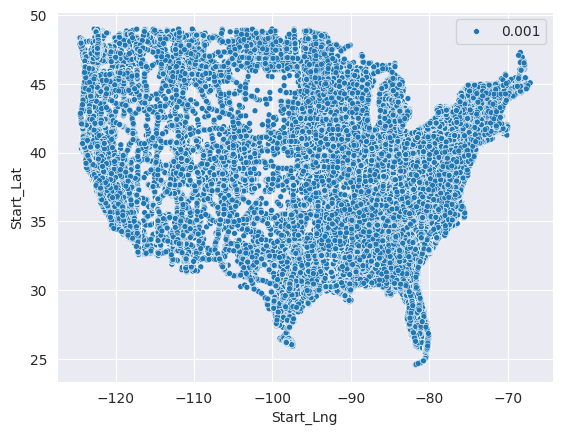

In [50]:
sns.scatterplot(x = df.Start_Lng, y =df.Start_Lat, size = 0.001)

In [53]:
!pip install folium --quiet


In [54]:
import folium

In [ ]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]

In [58]:
map = folium.Map()
folium.Marker((lat,lon))

NameError: name 'lat' is not defined

## Answer questions

1. Are thre more accidents in warmer or cold areas?
2. Which 5 states have more accidents? How about per capita?
3. Does NewYork showup in the data? If yes why is the count lower if this is the most populated city.
4. Among the top 100 cities in number of accidents, which state they belong to most frequently?
5. What time of the day are most accidents frequent in?
6. What days of the week the most accidents happen?
7. Which months does most accidents happen?
8. What trend of accidents year over year (Increasing/ Decreasing)
9. When is accidents per unit of traffic highest?

## Summary and Conclusion

Insights:
- No data for NewYork.
- The number of accidents per city decreases exponentially
- Less than 5% cities have more than 1000 yealry accidents
- Over 1000 cities have reported just 1 accident over year (Need to investigate)